### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


### (1) What is the independent variable? What is the dependent variable?

Independent variable: It is the word  and color were the "Congruent" or "Incongruent". <br>
Dependent variable: It is the sum of seconds to select the color of the word.

### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothsis:<br>
There is no effect When the word didn't Congruent with color.<br>
H0: μi ≤ μc <br>

Alternate Hypothesis:<br>
Need more second When the word didn't Congruent with color. <br>
H1: μi > μc <br>
<br>
<br>
(μi = mean of population  incongruent  ,μc = mean of population congruent)

We will choose  t-test, cause we have less than 30 samples and don’t know the population's standard deviation. <br>
We will choose two tailed , cause we want to know the variances response in the second.<br>
We will choose an independent Paired samples t-tests, cause there are two samples t-test used two separate sets 'Congruent' and 'Incongruent'  with the difference in mean involve independent samples.

### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import *
import pprint
% matplotlib inline

In [2]:
stroop= pd.read_csv('../Test a Perceptual Phenomenon.ipynb/stroopdata.csv') #read a data

In [3]:
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
stroop.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [5]:
congruent_mean=stroop.Congruent.mean()
print(congruent_mean)
incongruent_mean=stroop.Incongruent.mean()
print(incongruent_mean)

14.051125000000004
22.01591666666667


In [6]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Standard Deviation: <br> σ=Σ(x - mean)2/n

Congruent:3.559 <br>
Incongruent:4.797<br>
<br>


Mean:<br>
Congruent:14.05 <br>
Incongruent:22.0<br>
The mean of 'Congruent' is smaller than the mean of 'Incongruent' .<br>
<br>
Data size= 24<br>
<br>

In [7]:
stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [8]:
print(stroop.describe())

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


In [9]:
variances_mean=incongruent_mean- congruent_mean
print(variances_mean)

7.964791666666665


In [10]:
incongruent=stroop['Incongruent']
congruent=stroop['Congruent']
variances=incongruent-congruent
print(variances)

0      7.199
1      1.950
2     11.650
3      7.057
4      8.134
5      8.640
6      9.880
7      8.407
8     11.361
9     11.802
10     2.196
11     3.346
12     2.437
13     3.401
14    17.055
15    10.028
16     6.644
17     9.790
18     6.081
19    21.919
20    10.950
21     3.727
22     2.348
23     5.153
dtype: float64


### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0, 0.5, 'Frequency')

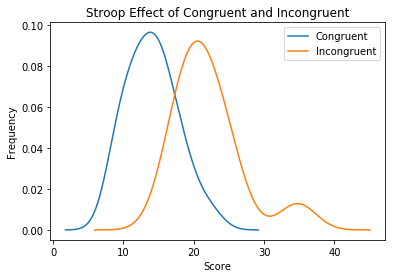

In [11]:
# Build the visualizations here
stroop.plot.kde()
plt.title('Stroop Effect of Congruent and Incongruent')
plt.xlabel('Score')
plt.ylabel('Frequency')

Most of the participants took a long time on Incongruent status more then Congruent status.

Text(0, 0.5, 'Frequency')

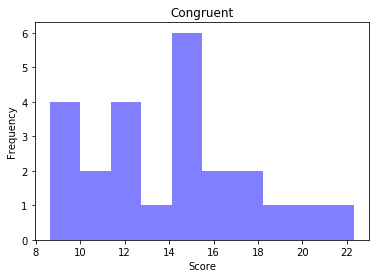

In [12]:
stroop.Congruent.plot(color='blue',kind ='hist',label ='Congruent',alpha= 0.5)
plt.title('Congruent')
plt.xlabel('Score')
plt.ylabel('Frequency')

Most of participants completed the test between 14 and 16 seconds.

Text(0, 0.5, 'Frequency')

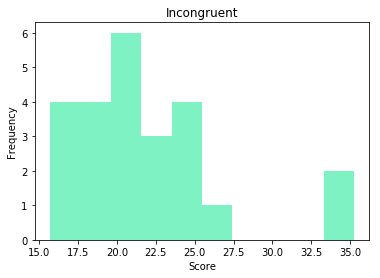

In [13]:
stroop.Incongruent.plot(color='#00e68a',kind ='hist',label ='Incongruent',alpha= 0.5)
plt.title('Incongruent')
plt.xlabel('Score')
plt.ylabel('Frequency')

Most of participants completed the test between 19 and 21 seconds. <br>
There are a outliers between 33 and 35 seconds.

In [14]:
congruent=stroop["Congruent"]
incongruent=stroop["Incongruent"]

stroop["Variances"]=stroop["Congruent"]-stroop["Incongruent"]
stroop_variances=stroop["Variances"]
print(stroop_variances)

0     -7.199
1     -1.950
2    -11.650
3     -7.057
4     -8.134
5     -8.640
6     -9.880
7     -8.407
8    -11.361
9    -11.802
10    -2.196
11    -3.346
12    -2.437
13    -3.401
14   -17.055
15   -10.028
16    -6.644
17    -9.790
18    -6.081
19   -21.919
20   -10.950
21    -3.727
22    -2.348
23    -5.153
Name: Variances, dtype: float64


In [15]:
print(stroop.describe())

       Congruent  Incongruent  Variances
count  24.000000    24.000000  24.000000
mean   14.051125    22.015917  -7.964792
std     3.559358     4.797057   4.864827
min     8.630000    15.687000 -21.919000
25%    11.895250    18.716750 -10.258500
50%    14.356500    21.017500  -7.666500
75%    16.200750    24.051500  -3.645500
max    22.328000    35.255000  -1.950000


Text(0, 0.5, 'Frequency')

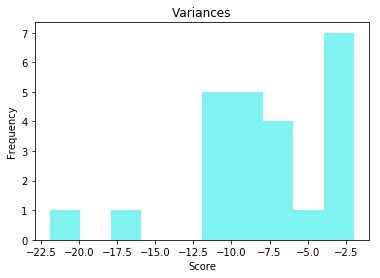

In [16]:
stroop.Variances.plot(color='#00e6e6',kind ='hist',label ='Variances',alpha= 0.5)
plt.title('Variances')
plt.xlabel('Score')
plt.ylabel('Frequency')

Distribution of difference between Congruent status and Incongruent status.

Text(0, 0.5, 'Frequency')

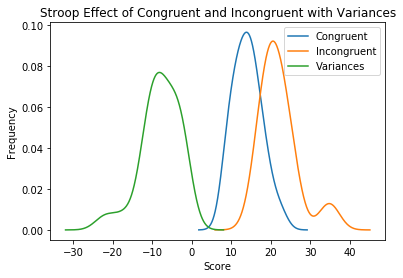

In [17]:
stroop.plot.kde()
plt.title('Stroop Effect of Congruent and Incongruent with Variances')
plt.xlabel('Score')
plt.ylabel('Frequency')

Distribution of Congruent status and Incongruent status with Variances them.

### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [18]:
n=len(stroop)
df= n-1
print('Degrees of freedom =',df)

alpha = 0.005
print('alpha =',alpha)
tcritical = stats.t.ppf(alpha, df)
print('tc=',tcritical)

Degrees of freedom = 23
alpha = 0.005
tc= -2.8073356837675236


In [19]:
# Perform the statistical test here
Result=stats.ttest_rel(stroop['Congruent'],stroop['Incongruent'])
print(Result)


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)


In [20]:
print('variances_mean=',variances_mean)

sd=stroop.Variances.std()
print('standard deviation of Variances =',sd)

variances_mean= 7.964791666666665
standard deviation of Variances = 4.864826910359056


In [21]:
sq=sqrt(n)
SE= sd/sq
print('standard error of the variances=',SE)

standard error of the variances= 0.9930286347783406


### Conclusion
t-statistic > critical t-value <br>
p-value < 0.0001
<br>
We will reject the null hypothesis,cause incongruent states don't take more seconds than congruent states.

### References

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/ <br>
https://en.wikipedia.org/wiki/Student%27s_t-test#Unpaired_and_paired_two-sample_t-tests